In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
df =pd.read_csv('GOOG.csv')

# 数据处理

**close**:当日股市收盘价；**high**：当日股票最高价；  
**low**：当日股市最低价；**open**：当日股票开盘价；  
**volume**：当日交易量；**adjClose**:调整后收盘价；  
**adjHigh**：调整后最高价；**adjLow**：调整后最低价；  
**adjOpen**：调整后开盘价；**adjVolume**：调整交易量；  
**divCash**：现金分红；**splitFactor**：股票分割因子。

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [4]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [5]:
df['date'] = pd.to_datetime(df['date'])
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [6]:
df=df.drop(columns=['symbol','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'])
df

df = df.sort_values(by='date')
df

df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df

df = df.set_index('date')
df

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


# 数据可视化

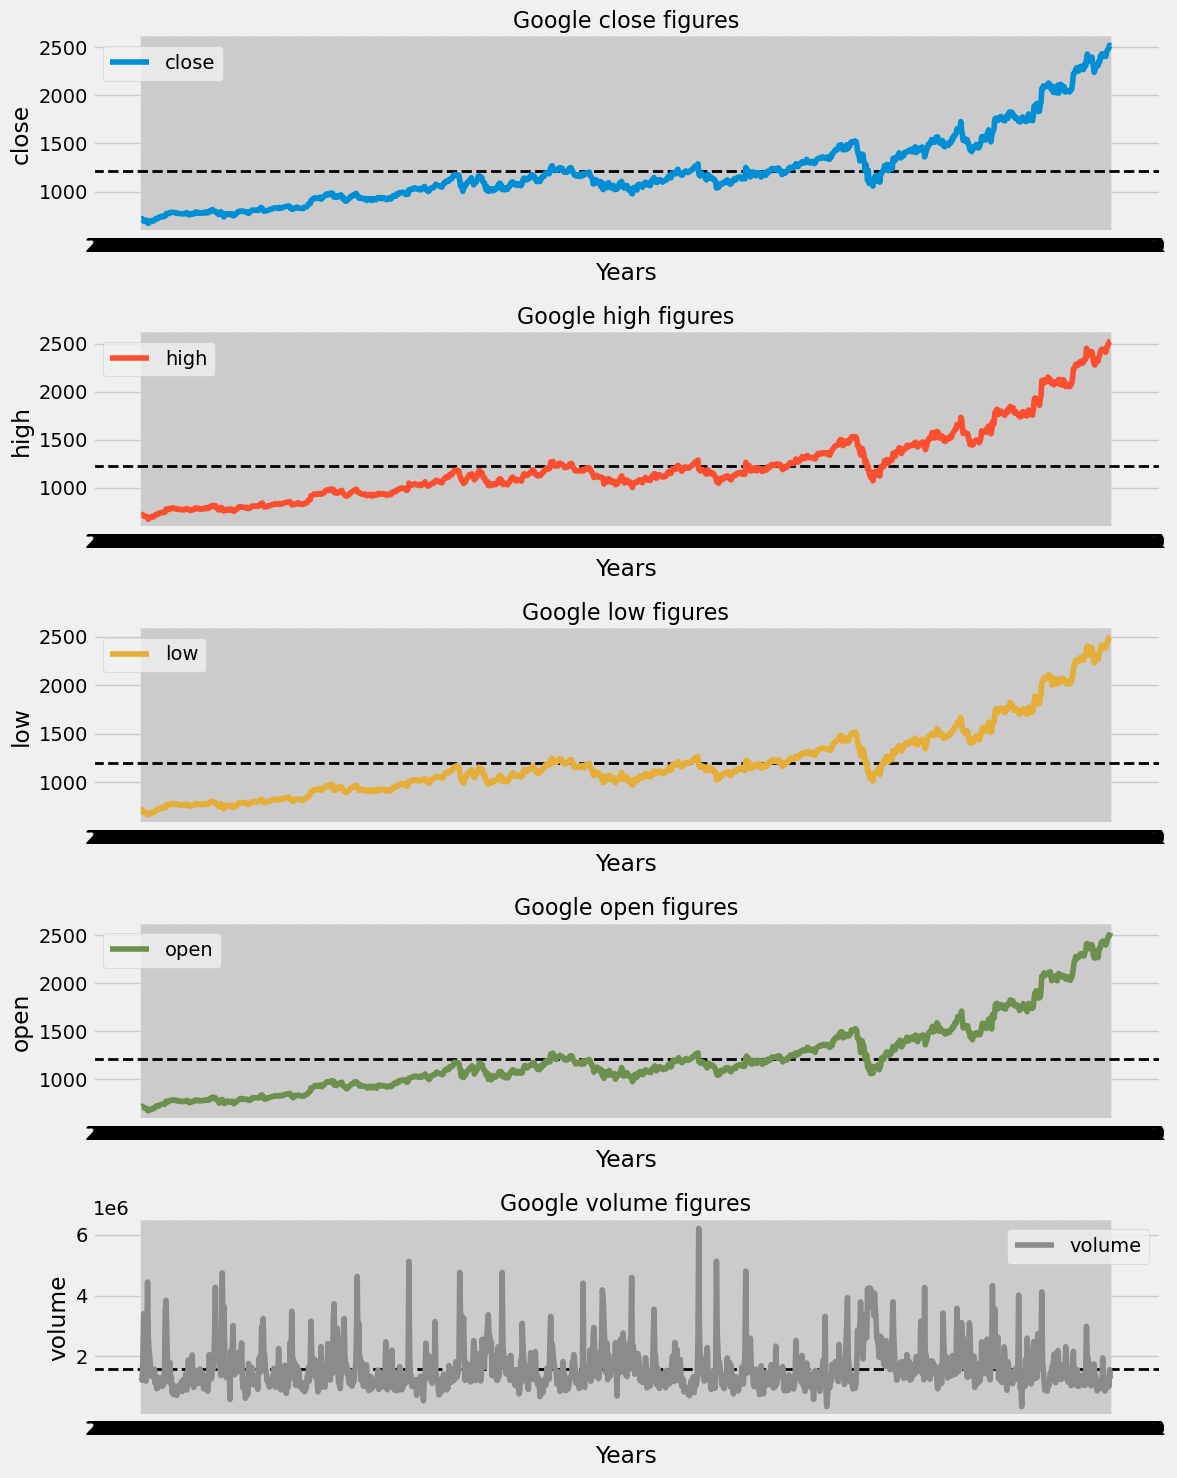

In [7]:
a = 5
b = 1
c = 1
colors = plt.rcParams["axes.prop_cycle"]()
# 图形初始化 
fig = plt.figure(figsize=(12,15))

for i in range(len(df.columns)):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    plt.plot(df[df.columns[i]], color = color)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #添加一条平均值线
    plt.axhline(df[df.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    #标题
    plt.title("Google "+ df.columns[i] + " figures", fontsize=16)
    plt.xlabel('Years')
    plt.ylabel(df.columns[i])
    #图例
    plt.legend([df.columns[i]])
    c = c + 1

#收紧布局
plt.tight_layout()
plt.show()

# 数据预测

In [41]:
# 将收盘值储存在数组data中
pre = df["close"]
pre = pd.DataFrame(pre)

data = pre.values

data.shape

(1258, 1)

In [42]:
#将数组做归一化处理
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [43]:
# 75% to Train , 25% to Test
train_size = int(len(data)*.75)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 943 Test Size : 315


In [44]:
# 创建训练集
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [45]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [46]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [47]:
x_train.shape , y_train.shape

((883, 60, 1), (883,))

# LSTM模型训练

LSTM（长短时记忆，Long Short-Term Memory）是一种特殊的循环神经网络，专门设计用于处理长序列数据，相对于传统的RNN，LSTM能够更好地长期保持依赖关系，在股票价格预测上具有很多优势：  
1. 股票价格数据是时间序列数据，每个价格都与前面的价格相关。LSTM能捕捉这种事件依赖性，更准确地预测未来的价格走势；
2. 股票价格的变化通常不是线性的，LSTM可以学习非线性模式，适应复杂的价格波动。

In [48]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])#两个LSTM层和三个全连接层（Dense层）

model.compile(optimizer= 'adam', loss= 'mse' , metrics= ["mean_absolute_error"])

In [49]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 50, batch_size= 32 , callbacks= callbacks )

Epoch 1/50
28/28 [==============================] - 4s 37ms/step - loss: 0.0072 - mean_absolute_error: 0.0625
Epoch 2/50
28/28 [==============================] - 1s 38ms/step - loss: 7.3076e-04 - mean_absolute_error: 0.0210
Epoch 3/50
28/28 [==============================] - 1s 36ms/step - loss: 4.0722e-04 - mean_absolute_error: 0.0143
Epoch 4/50
28/28 [==============================] - 1s 40ms/step - loss: 3.8522e-04 - mean_absolute_error: 0.0145
Epoch 5/50
28/28 [==============================] - 1s 41ms/step - loss: 3.7644e-04 - mean_absolute_error: 0.0141
Epoch 6/50
28/28 [==============================] - 1s 37ms/step - loss: 3.6529e-04 - mean_absolute_error: 0.0140
Epoch 7/50
28/28 [==============================] - 1s 37ms/step - loss: 3.6462e-04 - mean_absolute_error: 0.0140
Epoch 8/50
28/28 [==============================] - 1s 37ms/step - loss: 3.7731e-04 - mean_absolute_error: 0.0143
Epoch 9/50
28/28 [==============================] - 1s 37ms/step - loss: 3.6012e-04 - mean_a

In [60]:
model_weights=model.get_weights()
model_weights

[array([[-0.03323837,  0.15784322, -0.11243216, -0.09362768,  0.04842377,
          0.02190752,  0.17750148,  0.08826245, -0.1648558 ,  0.13720804,
         -0.0630573 ,  0.07643208,  0.1225482 ,  0.03062614,  0.41374004,
          0.22491346, -0.10047594,  0.16459006, -0.15630235, -0.03558409,
          0.03501408, -0.14945716, -0.03450887, -0.06948101,  0.06392421,
          0.13213019,  0.0054532 ,  0.16587785,  0.201644  ,  0.08388846,
          0.14645532,  0.12013709, -0.09462764, -0.13995862,  0.05567512,
          0.12022312,  0.0115877 ,  0.50020146, -0.0295704 ,  0.02638621,
          0.00866492, -0.13366303,  0.05345625,  0.08516084, -0.05235438,
          0.06435716, -0.08025349,  0.01771851,  0.08463467,  0.05764147,
         -0.07737372, -0.12713966,  0.02306997,  0.12452542,  0.04134344,
         -0.13211407, -0.09892001,  0.00434382, -0.08074737, -0.12134077,
         -0.16596124,  0.11825191,  0.12033216, -0.08179236,  0.06389797,
         -0.03935502, -0.04390417, -0.

# 评估结果

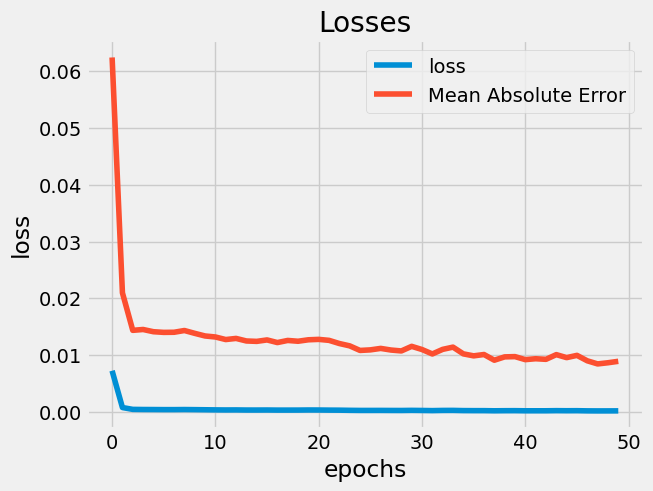

In [50]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['loss','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# 预测

In [51]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [52]:
x_test.shape , y_test.shape

((315, 60, 1), (315,))

In [53]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

10/10 [==============================] - 1s 12ms/step


(315, 1)

In [54]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

28.81

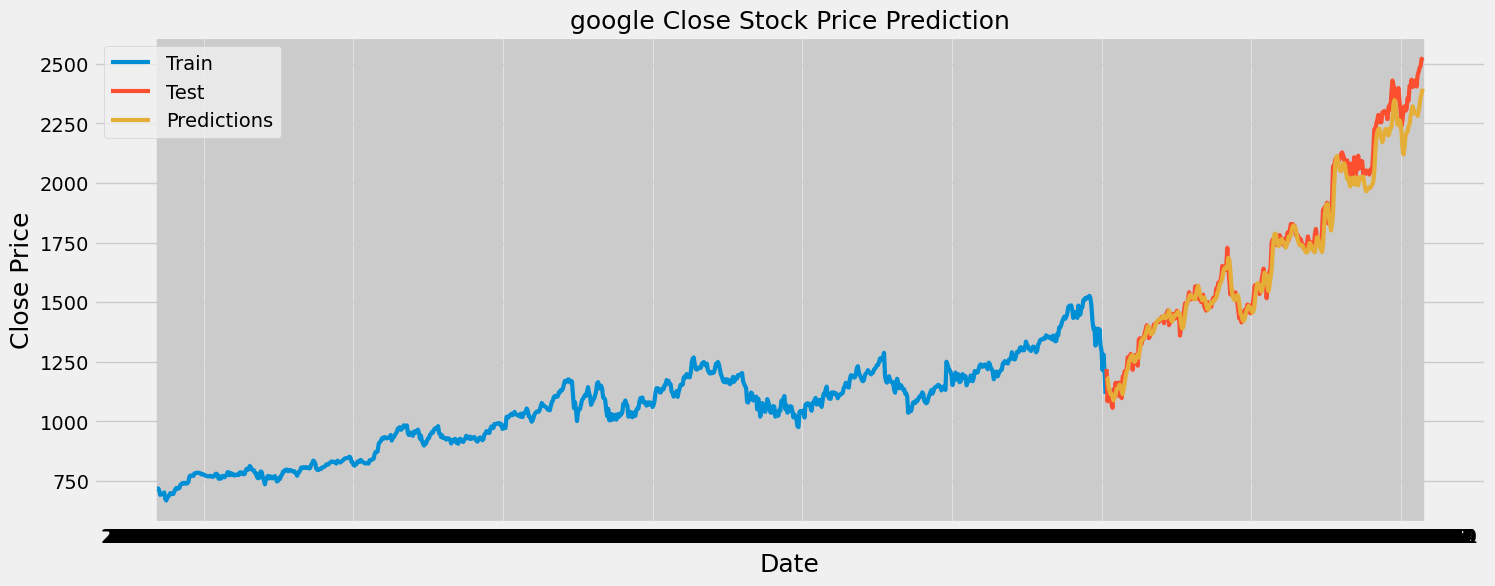

In [55]:
train = pre.iloc[:train_size , 0:1]
test = pre.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('google Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['close'], linewidth= 3)
plt.plot(test['close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])